# Quick Plotting Networks
## Producing Quick and Easy Plots of Topology within OpenPNM

The main way to visualize OpenPNM networks is Paraview, but this can be a bit a hassle when building a new network topology that needs quick feedback for troubleshooting. Starting in V1.6, OpenPNM offers two plotting functions for showing pore locations and the connections between them: openpnm.topotools.plot_coordinates and openpnm.topotools.plot_connections. This example demonstrates how to use these two methods.

## Visualize pore and throats in a 2D network
Start by initializing OpenPNM and creating a network. For easier visualization we'll use a 2D network:

In [1]:
import warnings
import scipy as sp
import numpy as np
import openpnm as op
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(10)
ws = op.Workspace()
ws.settings['loglevel'] = 40
np.set_printoptions(precision=4)
net = op.network.Cubic(shape=[5, 5, 1])

Next we'll add boundary pores to two sides of the network, to better illustrate these plot commands:

In [2]:
net.add_boundary_pores(['left', 'right'])

Now let's use ``plot_coordinates`` to plot the pore centers in a 3D plot, starting with the internal pores:

AttributeError: module 'openpnm.topotools' has no attribute 'plot_coordinates'

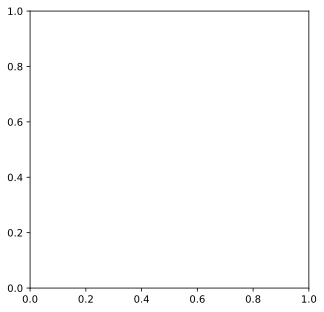

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
fig = op.topotools.plot_coordinates(network=net, pores=net.pores('internal'), 
                                    markersize=50, c='r', ax=ax)

Note that the above call to plot_coordinates returns a figure handle fig. This can be passed into subsequent plotting methods to overlay points.

In [4]:
Ps = net.pores('*boundary')
op.topotools.plot_coordinates(network=net, pores=Ps, ax=ax, 
                              markersize=50, c='b')

AttributeError: module 'openpnm.topotools' has no attribute 'plot_coordinates'

Next, let's add lines to the above plot indicating the throat connections. Again, by reusing the fig object we can overlay more information:

In [5]:
Ts = net.find_neighbor_throats(pores=Ps)
op.topotools.plot_connections(network=net, throats=Ts, ax=ax, c='b')
Ts = net.find_neighbor_throats(pores=net.pores('internal'), mode='xnor')
op.topotools.plot_connections(network=net, throats=Ts, ax=ax, c='r')

AttributeError: module 'openpnm.topotools' has no attribute 'plot_connections'

These two methods are meant for quick and rough visualizations.  If you require high quality 3D images, you should use Paraview:

<img src="https://i.imgur.com/uSBVFi9.png" style="width: 60%" align="left"/>

## Visualize in 3D too

The ``plot_connections`` and ``plot_coordinates`` methods also work in 3D.

AttributeError: module 'openpnm.topotools' has no attribute 'plot_connections'

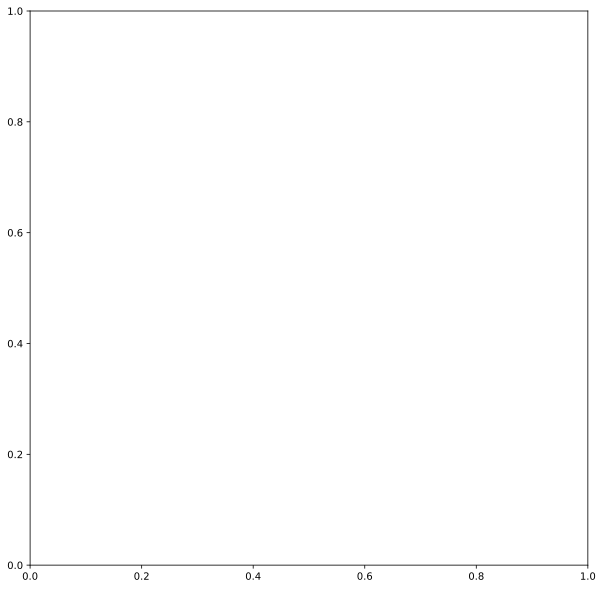

In [6]:
net = op.network.Voronoi(points=100, shape=[1, 1, 1])
fig, ax = plt.subplots(figsize=(10, 10))
op.topotools.plot_connections(network=net, c='g', ax=ax)
op.topotools.plot_coordinates(network=net, c='r', 
                              ax=ax, markersize=30)

The above plot is a static image generated at a default angle.  It is possible to get an interactive window that can be rotated and zoomed.  This is done by entering ``%matplotlib notebook`` at the top of the notebook.  To return to the default behavior, use ``%matplotlib inline``.

Any arguments passed to either plot function that are not expected will be passed onto the matplotlib ``plot`` command which is used to generate these graphs.  This means you can adjust the appearance to the extent that you can figure out which commands to send to ``plot``.  For instance, the following code creates fatter lines and makes them slightly transparent, then the markers are changed to an 'x' and their size is selected randomly.

AttributeError: module 'openpnm.topotools' has no attribute 'plot_connections'

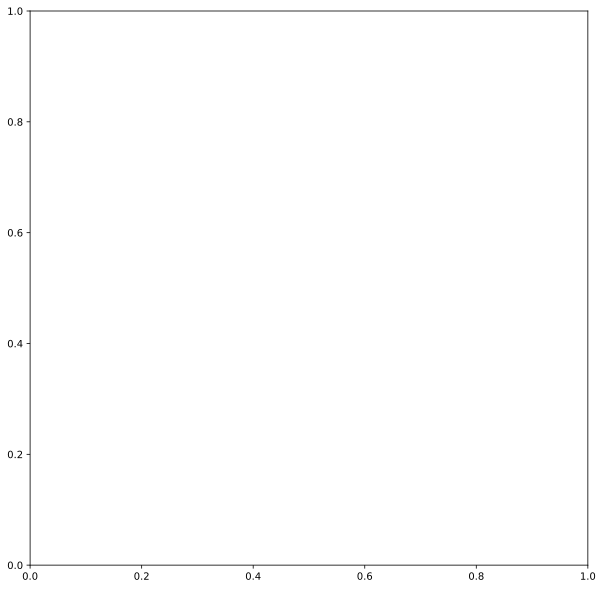

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
op.topotools.plot_connections(network=net, c='g',
                              linewidth=3, alpha=0.5, ax=ax)
op.topotools.plot_coordinates(network=net, c='r', 
                              markersize=np.random.rand(net.Np)*100, 
                              marker='x', ax=ax)  